
Test Counts:
Class 2 (Mixed): 8 instances
Class 1 (Recycling): 12 instances
Class 0 (Organic): 7 instances
Class 3 (Other): 1 instances

Train Counts:
Class 2 (Mixed): 192 instances
Class 1 (Recycling): 309 instances
Class 0 (Organic): 180 instances
Class 3 (Other): 30 instances

Valid Counts:
Class 0 (Organic): 23 instances
Class 2 (Mixed): 16 instances
Class 1 (Recycling): 27 instances
Class 3 (Other): 2 instances

Total Counts:
Class 2 (Mixed): 216 instances
Class 1 (Recycling): 348 instances
Class 0 (Organic): 210 instances
Class 3 (Other): 33 instances

Test Multiclass Distribution:
1 Class: 20 images
2 Classes: 1 images
3+ Classes: 0 images

Train Multiclass Distribution:
1 Class: 441 images
2 Classes: 33 images
3+ Classes: 3 images

Valid Multiclass Distribution:
1 Class: 43 images
2 Classes: 2 images
3+ Classes: 0 images


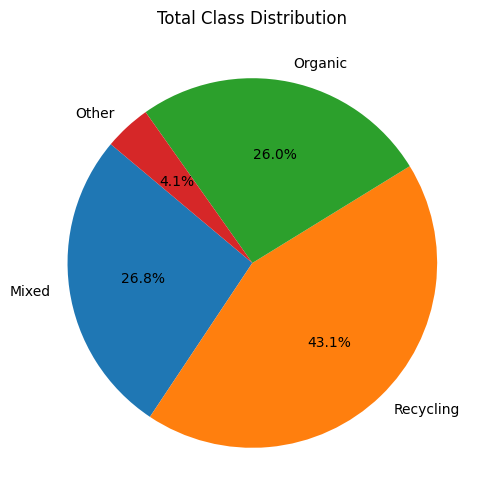

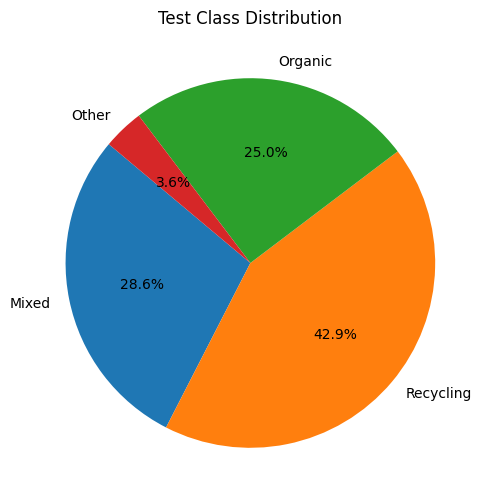

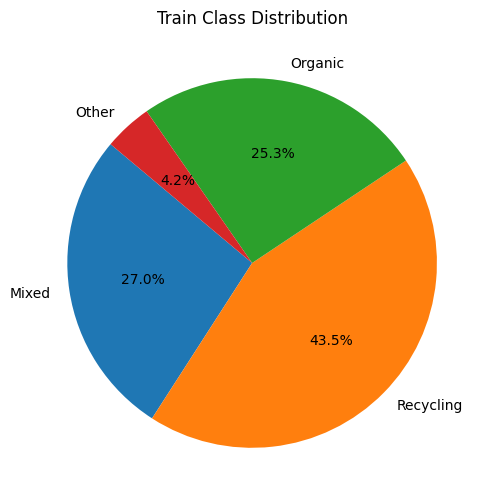

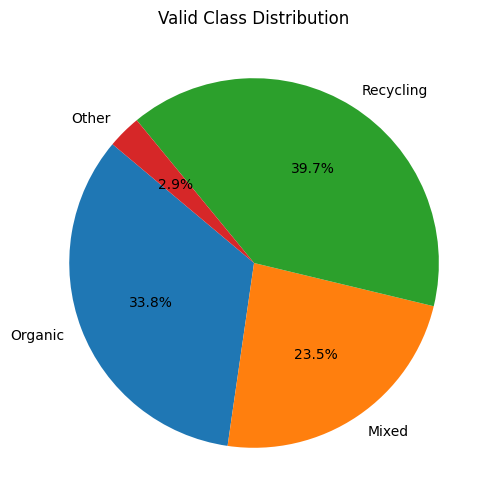

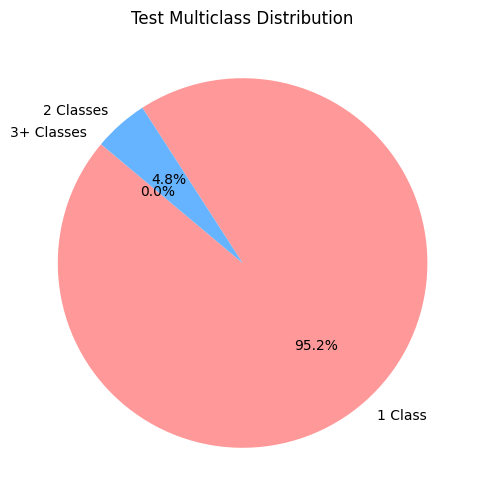

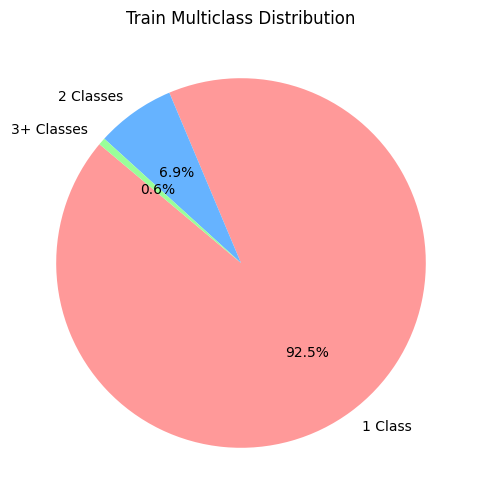

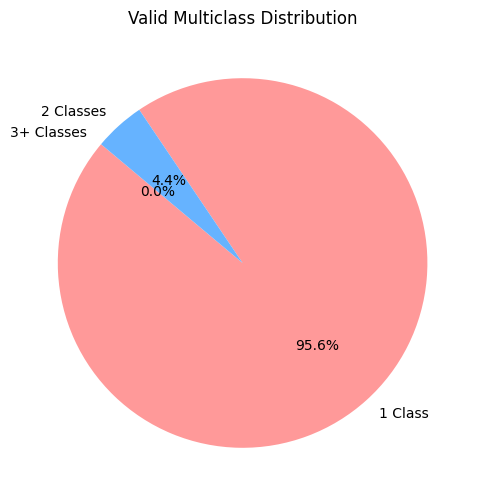

In [4]:
import os
from collections import Counter
import matplotlib.pyplot as plt

# Base folder containing the datasets
base_folder = "./data"

# Dictionary to map class IDs to names
class_names = {
    0: "Organic",
    1: "Recycling",
    2: "Mixed",
    3: "Other"
}

# Function to count classes from label files in a specific folder
def count_classes_in_folder(folder_path):
    class_counts = Counter()
    for label_file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, label_file)
        if os.path.isfile(file_path) and label_file.endswith(".txt"):
            with open(file_path, "r") as f:
                for line in f:
                    class_id = int(line.split()[0])  # Extract the class ID
                    class_counts[class_id] += 1
    return class_counts

# Function to count single, two, and three/more class images
def count_multiclass_images(folder_path):
    class_combinations = Counter({"1 Class": 0, "2 Classes": 0, "3+ Classes": 0})
    for label_file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, label_file)
        if os.path.isfile(file_path) and label_file.endswith(".txt"):
            with open(file_path, "r") as f:
                classes_in_image = set(line.split()[0] for line in f)  # Extract unique class IDs
                if len(classes_in_image) == 1:
                    class_combinations["1 Class"] += 1
                elif len(classes_in_image) == 2:
                    class_combinations["2 Classes"] += 1
                else:
                    class_combinations["3+ Classes"] += 1
    return class_combinations

# Directories for test, train, and valid labels
folders = {
    "test": os.path.join(base_folder, "test/labels"),
    "train": os.path.join(base_folder, "train/labels"),
    "valid": os.path.join(base_folder, "valid/labels"),
}

# Count classes for each folder and overall
total_counts = Counter()
folder_counts = {}
multiclass_distributions = {}

for folder_name, folder_path in folders.items():
    # Count individual class distributions
    folder_counts[folder_name] = count_classes_in_folder(folder_path)
    total_counts.update(folder_counts[folder_name])

    # Count multiclass distributions
    multiclass_distributions[folder_name] = count_multiclass_images(folder_path)

# Display individual class counts
for folder_name, counts in folder_counts.items():
    print(f"\n{folder_name.capitalize()} Counts:")
    for class_id, count in counts.items():
        print(f"Class {class_id} ({class_names[class_id]}): {count} instances")

print("\nTotal Counts:")
for class_id, count in total_counts.items():
    print(f"Class {class_id} ({class_names[class_id]}): {count} instances")

# Display multiclass distributions
for folder_name, counts in multiclass_distributions.items():
    print(f"\n{folder_name.capitalize()} Multiclass Distribution:")
    for key, count in counts.items():
        print(f"{key}: {count} images")

# Function to plot a pie chart for class distribution
def plot_pie_chart(class_counts, title):
    labels = [class_names[class_id] for class_id in class_counts.keys()]
    sizes = [count for count in class_counts.values()]
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140)
    plt.title(title)
    plt.show()

# Function to plot a pie chart for multiclass distributions
def plot_multiclass_pie_chart(multiclass_counts, title):
    labels = multiclass_counts.keys()
    sizes = multiclass_counts.values()
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140, colors=["#ff9999", "#66b3ff", "#99ff99"])
    plt.title(title)
    plt.show()

# Generate pie charts for class distributions
plot_pie_chart(total_counts, "Total Class Distribution")
for folder_name, counts in folder_counts.items():
    plot_pie_chart(counts, f"{folder_name.capitalize()} Class Distribution")

# Generate pie charts for multiclass distributions
for folder_name, counts in multiclass_distributions.items():
    plot_multiclass_pie_chart(counts, f"{folder_name.capitalize()} Multiclass Distribution")

# Dataset Distribution Analysis

The dataset was created to ensure a balanced representation of the four waste categories: Organic (Class 0), Recycling (Class 1), Mixed (Class 2), and Other (Class 3). Across the test, train, and validation datasets, Recycling is the most appearing class, representing 43.1% of the total instances, followed by Mixed (26.8%), Organic (26%) and Other (4.1%). Within the test set, which contains 28 waste instances, Recycling dominates with 42.9%, Mixed accounts for 28.6%, Organic for 25%, and Other for just 3.6%. The train set, with 714 waste instances, shows a similar trend, with Recycling contributing 43.3%, Mixed 26.9%, Organic 25.2%, and Other 4.2%. The validation set, containing 68 instances, sees Recycling at 39.7%, Organic at 33.8%, Mixed at 23.5%, and Other at 2.9%. These proportions demonstrate a balanced dataset suitable for training and testing object detection models, with Recycling being the most prominent class across all sets.

An analysis of multiclass distribution revealed that most images contain only a single class of waste. In the test set, 95.2% of images are single-class, with only 4.8% containing two classes and none featuring three or more. The train set is similar, with 92.5% single-class images, 6.9% two-class, and 0.6% three-class images. The validation set mirrors this, with 95.6% single-class images and 4.4% two-class images. This indicates that the dataset predominantly focuses on images with isolated waste types, which simplifies training but may limit the model’s ability to generalise in scenarios involving multiple waste types in a single image.

In conclusion, the dataset is well-balanced across classes and datasets, ensuring diversity for model training and testing. While the class distribution is adequate, future iterations could consider increasing the proportion of multiclass images to better reflect real-world scenarios where multiple waste types often appear together.